Los chicos del ISTAC se lo han currado y han puesto en circulación una estupenda librería para acceder a los datos públicos de ese organismo.

Está muy bien documentada, en principio no he tenido problemas para cargar los datos y modificarlos.

La documentación es un pelín oscura en 'get_data', pero si indagas das con la solución. 

In [51]:
from istacpy.indicators.lite import indicators
import pandas as pd

# ¿Qué temas existen en la base de datos?
indicators.get_subjects()

(('011', 'Territorio y usos del suelo'),
 ('012', 'Medio ambiente'),
 ('021', 'Población'),
 ('022', 'Movimiento natural'),
 ('023', 'Movimientos migratorios'),
 ('031', 'Calidad de vida'),
 ('033', 'Educación'),
 ('036', 'Justicia y seguridad'),
 ('041', 'Cuentas económicas'),
 ('042', 'Precios, consumo e inversión'),
 ('043', 'Empresas y centros de trabajo'),
 ('051', 'Empleo'),
 ('061', 'Agricultura, ganadería, pesca y caza'),
 ('071', 'Industria, energía y agua'),
 ('072', 'Construcción y vivienda'),
 ('080', 'SECTOR SERVICIOS'),
 ('081', 'Comercio'),
 ('082', 'Hostelería y turismo'),
 ('083', 'Transporte y comunicaciones'),
 ('084', 'Servicios financieros, monetarios y seguros'),
 ('091', 'Administración pública'))

### Búsqueda en precios

In [52]:
indicators.get_indicators(subject_code='042')

(('IPC', 'Índice de precios de consumo (IPC). General'),
 ('IPC_SUBYACENTE', 'Índice de precios de consumo (IPC). Subyacente'))

In [53]:
indicator = indicators.get_indicator('IPC')
indicator.info()

· Class: istacpy.indicators.lite.indicators.Indicator
· Indicator code: IPC
· Title: Índice de precios de consumo (IPC). General
· Subject: Precios, consumo e inversión
· Description: El Índice de Precios de Consumo (IPC) tiene como objetivo medir la evolución de los precios de los bienes y servicios de consumo adquiridos por los hogares residentes en España
· Geographical granularities: {'COUNTRIES': 'T', 'REGIONS': 'R', 'PROVINCES': 'P'}
· Time granularities: {'MONTHLY': 'M'}
· Measures: {'ABSOLUTE': 'A', 'ANNUAL_PERCENTAGE_RATE': 'N', 'INTERPERIOD_PERCENTAGE_RATE': 'I'}
· Available years: 2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022


### Indicador por provincias

In [54]:
# tamízalo o ciérnelo para las granulometrías, (qué raros son los estadísticos).
dime = indicator.get_data(geo='P')
# lo enchufas al marco de datos
df= dime.as_dataframe()
df

,ES423,ES212,ES512,ES614,ES424,ES615,ES241,ES616,ES413,ES513,...,ES432,ES612,ES130,ES522,ES630,ES422,ES613,ES530,ES111,Las Palmas
2002-01,70.73,69.23,67.17,70.56,70.88,70.46,69.74,70.99,68.59,67.21,...,71.48,71.73,69.50,70.44,73.04,69.79,69.62,69.74,68.55,75.58
2002-02,70.81,69.18,67.25,70.66,70.64,70.54,69.67,71.09,68.65,67.37,...,71.59,71.56,69.50,70.55,73.13,69.75,69.75,69.97,68.84,75.65
2002-03,71.34,69.60,67.75,71.19,71.22,71.35,70.18,71.68,69.14,68.38,...,72.13,72.09,70.07,70.99,73.90,70.30,70.31,70.48,69.42,76.17
2002-04,72.12,70.60,68.78,72.43,72.10,72.48,71.00,72.38,70.22,69.22,...,73.12,73.10,71.07,72.28,74.80,71.58,71.64,71.21,70.31,77.38
2002-05,72.65,70.79,68.95,72.53,72.49,72.67,71.18,73.40,70.47,69.47,...,73.30,73.39,71.20,72.73,75.30,71.70,71.78,71.45,70.62,77.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04,109.20,106.42,107.75,107.50,108.54,108.14,108.81,107.86,109.58,108.08,...,107.81,107.28,107.21,108.28,106.94,109.24,108.32,106.63,107.41,106.25
2022-05,110.27,107.31,108.81,108.37,109.63,109.12,109.53,109.22,110.70,109.18,...,108.64,108.21,108.00,109.24,107.73,110.20,109.09,107.73,108.42,106.94
2022-06,112.68,109.16,111.06,110.82,112.19,110.98,112.23,111.14,113.14,111.72,...,110.70,110.12,110.03,111.58,109.35,113.05,111.22,109.84,110.59,108.58
2022-07,112.18,109.34,111.10,110.11,111.90,110.69,111.58,110.52,112.91,111.76,...,109.97,109.86,109.93,111.10,108.87,112.59,110.47,109.76,110.16,109.03


### ¿Qué etiqueta tienen las provincias canarias?

In [55]:
df.columns
# cada provincia de España tiene un indicador, entre ellos, los del ISTAC han dado nombre a las dos provincias canarias

Index(['ES423', 'ES212', 'ES512', 'ES614', 'ES424', 'ES615', 'ES241', 'ES616',
       'ES413', 'ES513', 'ES112', 'ES300', 'ES617', 'ES640', 'ES620', 'ES220',
       'ES113', 'ES414', 'ES114', 'ES415', 'Santa Cruz de Tenerife', 'ES416',
       'ES230', 'ES618', 'ES417', 'ES514', 'ES242', 'ES425', 'ES418', 'ES419',
       'ES243', 'ES523', 'ES421', 'ES521', 'ES611', 'ES211', 'ES120', 'ES411',
       'ES431', 'ES511', 'ES213', 'ES412', 'ES432', 'ES612', 'ES130', 'ES522',
       'ES630', 'ES422', 'ES613', 'ES530', 'ES111', 'Las Palmas'],
      dtype='object')

### Marco con sólo las provincias canarias

In [56]:
df_provincias_canarias = df[['Santa Cruz de Tenerife', 'Las Palmas']]

In [57]:
# Enséñame la patita de tus tipos
type(df_provincias_canarias)

pandas.core.frame.DataFrame

### Inflación en España

In [ ]:
# Ciérnes
dime = indicator.get_data(geo='T')
# Derívalo al marco de datos
df_españa = dime.as_dataframe()
# Míralo
df_españa

,ES
2002-01,69.53
2002-02,69.59
2002-03,70.17
2002-04,71.12
2002-05,71.37
...,...
2022-04,107.38
2022-05,108.26
2022-06,110.27
2022-07,109.99


In [ ]:
# enséñame la patita
df_españa.dtypes

ES    float64
dtype: object

### Concatenamos los dos marcos para que quede bonito

In [66]:
df_comparador = pd.concat([df_españa, df_provincias_canarias], axis=1)
df_comparador

,ES,Santa Cruz de Tenerife,Las Palmas
2002-01,69.53,75.06,75.58
2002-02,69.59,75.07,75.65
2002-03,70.17,75.56,76.17
2002-04,71.12,76.07,77.38
2002-05,71.37,76.39,77.62
...,...,...,...
2022-04,107.38,106.16,106.25
2022-05,108.26,106.79,106.94
2022-06,110.27,108.27,108.58
2022-07,109.99,108.11,109.03


In [65]:
# un vistazo al eje de las x
df_comparador.index

Index(['2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
       '2002-07', '2002-08', '2002-09', '2002-10',
       ...
       '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04',
       '2022-05', '2022-06', '2022-07', '2022-08'],
      dtype='object', length=248)

### Gráfico, (Qué mal rollito a partir del año 2021)

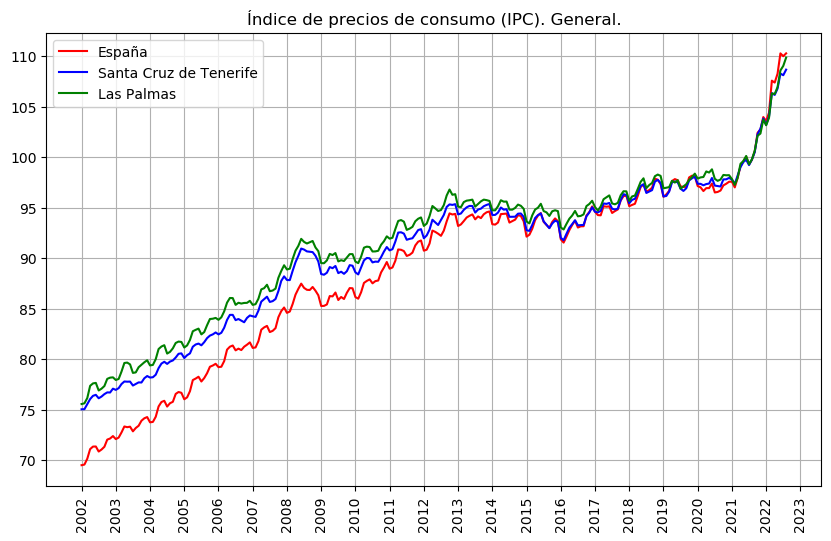

In [102]:
import matplotlib.pyplot as plt

x = df_comparador.index
y = df_comparador['ES']
z = df_comparador['Santa Cruz de Tenerife']
j = df_comparador['Las Palmas']

plt.figure(figsize=(10,6), dpi=100)
plt.plot(x, y, color='red', label='España')
plt.plot(x, z, color='blue', label= 'Santa Cruz de Tenerife')
plt.plot(x, j, color='green', label= 'Las Palmas')
plt.legend(loc="upper left")
plt.title('Índice de precios de consumo (IPC). General.')
# Las espinas son la parte más dificil de gráfico, 
plt.xticks(range(0,259,12), range(2002,2024), rotation ='vertical')
plt.grid()
plt.show()